In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

In [2]:
data = pd.read_csv('P:/python/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [7]:
data1 = data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [8]:
data1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

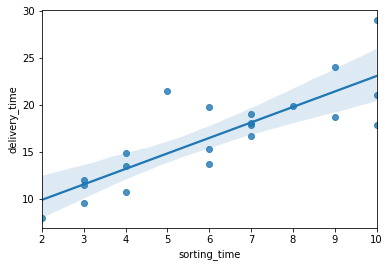

In [9]:
sns.regplot(x='sorting_time',y='delivery_time',data=data1)

Here the data follows stright line so it is linear. And the directions +ve. And the strength is stronger. 

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'delivery time')

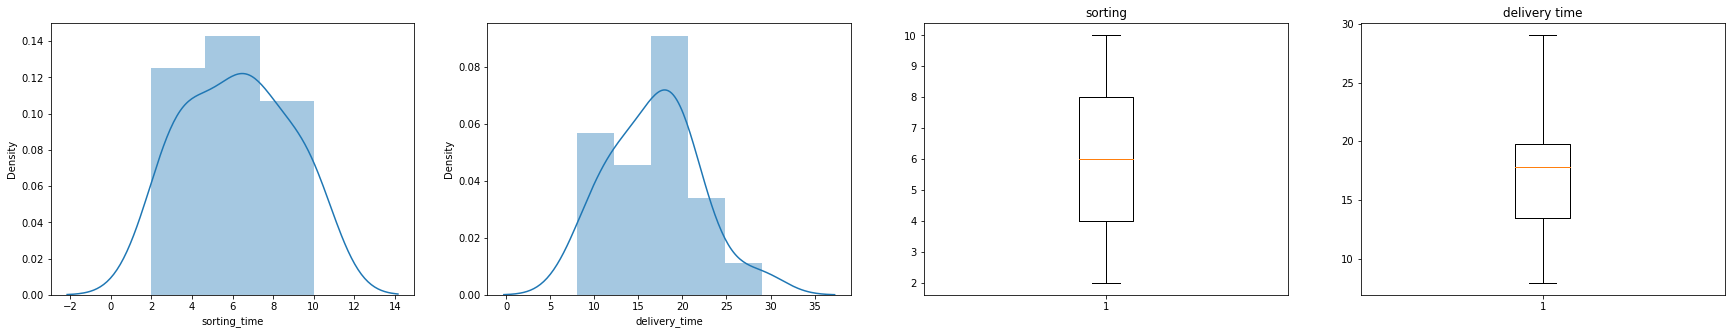

In [10]:
plt.subplots(figsize=(30,5))
plt.subplot(1,4,1)
sns.distplot(data1.sorting_time)
plt.subplot(1,4,2)
sns.distplot(data1.delivery_time)
plt.subplot(1,4,3)
plt.boxplot(data1.sorting_time)
plt.title('sorting')
plt.subplot(1,4,4)
plt.boxplot(data1.delivery_time)
plt.title('delivery time')

In this data there is no outliers. And sorting time following normal distribution. Delivery time is not following normal distribution.

## Transformations

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 1.0, 'poly')

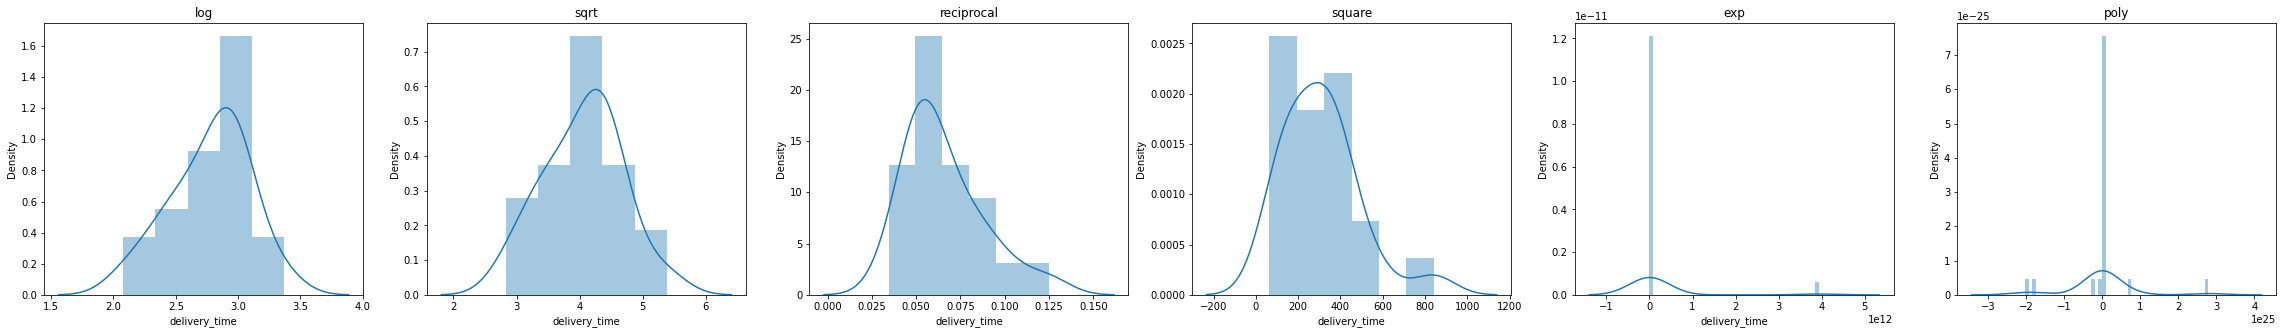

In [11]:
l = np.log(data1.delivery_time)
s = np.sqrt(data1.delivery_time)
r = np.reciprocal(data1.delivery_time)
sq = np.square(data1.delivery_time)
e = np.exp(data1.delivery_time)
p = np.poly(data1.delivery_time)
plt.subplots(figsize=(40,5))
plt.subplot(1,6,1)
sns.distplot(l)
plt.title('log')
plt.subplot(1,6,2)
sns.distplot(s)
plt.title('sqrt')
plt.subplot(1,6,3)
sns.distplot(r)
plt.title('reciprocal')
plt.subplot(1,6,4)
sns.distplot(sq)
plt.title('square')
plt.subplot(1,6,5)
sns.distplot(e)
plt.title('exp')
plt.subplot(1,6,6)
sns.distplot(p)
plt.title('poly')

In [12]:
s

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: delivery_time, dtype: float64

After doing transformations the data by applying "sqrt" the data follows normal distribution. 

In [13]:
model = smf.ols("delivery_time ~ sorting_time",data = data1).fit()

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
model.tvalues, model.pvalues   

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        14:27:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
data1.insert(2,"sqrt_delivery",s)
data1

,delivery_time,sorting_time,sqrt_delivery,sort_delivery
0,21.00,10,4.582576,4.582576
1,13.50,4,3.674235,3.674235
2,19.75,6,4.444097,4.444097
3,24.00,9,4.898979,4.898979
4,29.00,10,5.385165,5.385165
5,15.35,6,3.917908,3.917908
6,19.00,7,4.358899,4.358899
7,9.50,3,3.082207,3.082207
8,17.90,10,4.230839,4.230839
9,18.75,9,4.330127,4.330127


In [18]:
model1 = smf.ols("sqrt_delivery ~ sorting_time",data = data1).fit()

In [19]:
model1.params

Intercept       2.772731
sorting_time    0.206632
dtype: float64

In [79]:
model1.tvalues, model1.pvalues

(Intercept       13.527452
 sorting_time     6.723095
 dtype: float64,
 Intercept       3.339366e-11
 sorting_time    2.001215e-06
 dtype: float64)

In [76]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqrt_delivery   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           2.00e-06
Time:                        16:06:04   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

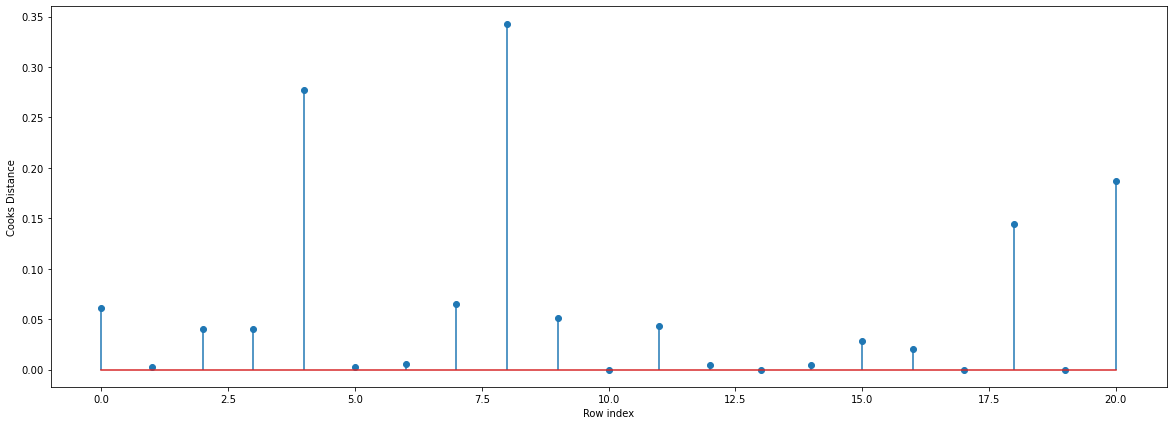

In [83]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
(np.argmax(c),np.max(c))

(8, 0.34328958722012193)

In [85]:
data1[data1.index.isin([8])]

,delivery_time,sorting_time,sqrt_delivery
8,17.9,10,4.230839


In [86]:
data_new = data1

In [87]:
data2=data_new.drop(data_new.index[[4]],axis=0).reset_index()

In [88]:
model2 = smf.ols('sqrt_delivery ~ sorting_time',data=data2).fit()

In [89]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          sqrt_delivery   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           9.99e-06
Time:                        16:14:47   Log-Likelihood:                -5.1739
No. Observations:                  20   AIC:                             14.35
Df Residuals:                      18   BIC:                             16.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8604      0.200     14.316      0.000       2.441       3.280
sorting_time     0.1875      0.031      6.059      0.000       0.122       0.252
==============================================================================
Omnibus:                        3.824   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                2.013
Skew:                           0.725   Prob(JB):                        0.366
Kurtosis:                       3.559   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
newdata=pd.Series([2,4])
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
model1.predict(data_pred)

0    3.185995
1    3.599258
dtype: float64

In [91]:
2.772731+0.206632*2

3.1859949999999997

In [92]:
preds = model1.predict(data1.sorting_time)
preds

0     4.839049
1     3.599258
2     4.012522
3     4.632417
4     4.839049
5     4.012522
6     4.219154
7     3.392626
8     4.839049
9     4.632417
10    4.425786
11    3.599258
12    4.219154
13    3.392626
14    3.392626
15    3.599258
16    4.012522
17    4.219154
18    3.185995
19    4.219154
20    3.805890
dtype: float64

Here Predicted delivery time using sorting time with model1. Because the R^2 value of model1 is 0.704 is high when compare to other models. 

# RMSE

In [100]:
np.sqrt(np.mean((data1.delivery_time - preds)**2))

13.523348961576946

In [95]:
np.sqrt(np.mean((data1.sqrt_delivery - preds)**2))

0.33234594050965877

In [98]:
np.sqrt(np.mean((data2.sqrt_delivery - preds)**2))

0.6817542488346918

In the data "delivery time" is not following normal distribution. And by building model on it, which is named as "model" and the R^2 is 0.682 and the RMSE value is 13.523. After that by applying "sqrt" on "delivery time" it is following normal distribution. And by building model on it, which is named as "model1" and the R^2 is 0.704 and the RMSE value is 0.332. and by applying "Cooks Distance" on the data. And by building model on it, which is named as "model2" and the R^2 is 0.671 and the RMSE value is 0.681.

by seeing all models, model1 R^2 value is 0.704 and RMSE value is 0.332. this is the best model. why because the r^2 value is high by compare to other model.